In [52]:
from quactography.adj_matrix.io import load_graph
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
# Plot the adjacency matrix of a graph
# Load outputgt_fiber.npz :
# Read npz file:
data = load_graph('outputgr_fiber.npz')
data1 = load_graph('ish.npz')
print(data)
print(data1)


(array([[0.        , 0.03623491, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03623491, 0.        , 0.06762991, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06762991, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03638344],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03638344,
        0.        ]]), array([ 534,  535,  536,  598,  599,  600,  601,  613,  614,  615,  616,
        655,  656,  657,  658,  659,  662,  663,  664,  665,  677,  678,
        679,  680,  719,  720,  721,  722,  723,  726,  727,  728,  729,
        741,  742,  743,  744,  783,  784,  785,  786,  787,  790,  791,
        792,  793,  805,  806,  807,  808,  847,  848,  849,  850,  851,
        855,  856,  857,  869,  870,  871,  872,  877,  

x [ 8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12
 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 

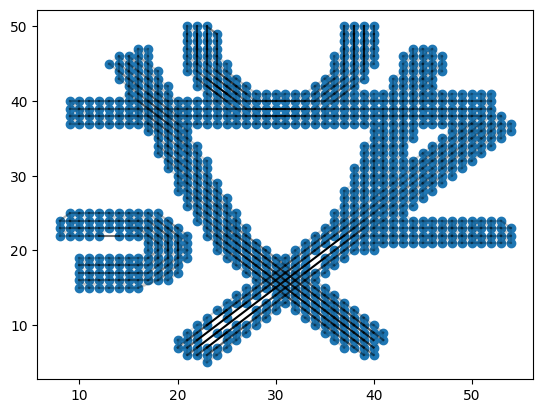

In [53]:
import pandas as pd 
import argparse 
# adj_matrix_from_csv = pd.DataFrame(data1['adjacency_matrix'])
# adj_matrix_from_csv


weighted_graph, node_indices, vol_dim = data
x, y = np.unravel_index(node_indices, vol_dim)
print("x", x)
print("y", y)
print("node_indices", node_indices)
print("vol_dim", vol_dim)
print("weighted_graph", weighted_graph)

weighted_graph = np.triu(weighted_graph)
print("weighted_graph", weighted_graph)

# draw the graph
for it, node_row in enumerate(weighted_graph):
    nb_adj = np.count_nonzero(node_row)
    if nb_adj > 0:
        w_all = node_row[node_row > 0]
        start_x, start_y = x[it], y[it]
        end_x = x[node_row > 0]
        end_y = y[node_row > 0]
        for vert_id in range(nb_adj):
            w = w_all[vert_id]
            alpha = np.clip(w * 0.9 + 0.1, 0.0, 1.0)
            plt.plot(
                [start_x, end_x[vert_id]],
                [start_y, end_y[vert_id]],
                color="black",
                alpha=alpha,
            )

plt.scatter(x, y)
plt.show()

x [0 0 0 0 0 0 0]
y [0 1 2 3 4 5 6]
node_indices [0 1 2 3 4 5 6]
vol_dim [7 7]
weighted_graph [[0. 1. 3. 2. 2. 1. 1.]
 [1. 0. 3. 1. 2. 2. 1.]
 [3. 3. 0. 3. 3. 3. 3.]
 [2. 1. 3. 0. 1. 3. 3.]
 [2. 2. 3. 1. 0. 3. 1.]
 [1. 2. 3. 3. 3. 0. 2.]
 [1. 1. 3. 3. 1. 2. 0.]]
weighted_graph [[0. 1. 3. 2. 2. 1. 1.]
 [0. 0. 3. 1. 2. 2. 1.]
 [0. 0. 0. 3. 3. 3. 3.]
 [0. 0. 0. 0. 1. 3. 3.]
 [0. 0. 0. 0. 0. 3. 1.]
 [0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0.]]


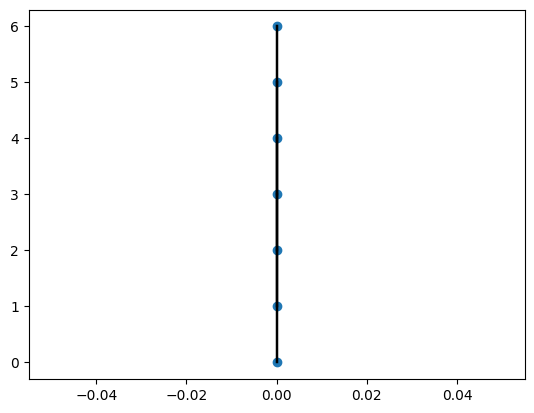

In [54]:
import pandas as pd 
import argparse 
# adj_matrix_from_csv = pd.DataFrame(data1['adjacency_matrix'])
# adj_matrix_from_csv


weighted_graph, node_indices, vol_dim = data1
x, y = np.unravel_index(node_indices, vol_dim)
print("x", x)
print("y", y)
print("node_indices", node_indices)
print("vol_dim", vol_dim)
print("weighted_graph", weighted_graph)

weighted_graph = np.triu(weighted_graph)
print("weighted_graph", weighted_graph)

# draw the graph
for it, node_row in enumerate(weighted_graph):
    nb_adj = np.count_nonzero(node_row)
    if nb_adj > 0:
        w_all = node_row[node_row > 0]
        start_x, start_y = x[it], y[it]
        end_x = x[node_row > 0]
        end_y = y[node_row > 0]
        for vert_id in range(nb_adj):
            w = w_all[vert_id]
            alpha = np.clip(w * 0.9 + 0.1, 0.0, 1.0)
            plt.plot(
                [start_x, end_x[vert_id]],
                [start_y, end_y[vert_id]],
                color="black",
                alpha=alpha,
            )

plt.scatter(x, y)
plt.show()